In [1]:
!pip install mne

In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt


In [2]:
# 定义BDF文件的路径
bdf_file_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf'

# 使用mne.io.read_raw_bdf函数读取BDF文件
raw = mne.io.read_raw_bdf(bdf_file_path, preload=True)



Extracting EDF parameters from /Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 103423  =      0.000 ...   201.998 secs...


In [4]:
# 打印EEG数据的基本信息
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2011-06-03 11:42:21 UTC
 nchan: 41
 projs: []
 sfreq: 512.0 Hz
>


In [8]:
%matplotlib widget

Effective window size : 4.000 (s)


/var/folders/8h/6kht9rs15kd0_jl_jwkk7kfr0000gn/T/ipykernel_978/510723517.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")


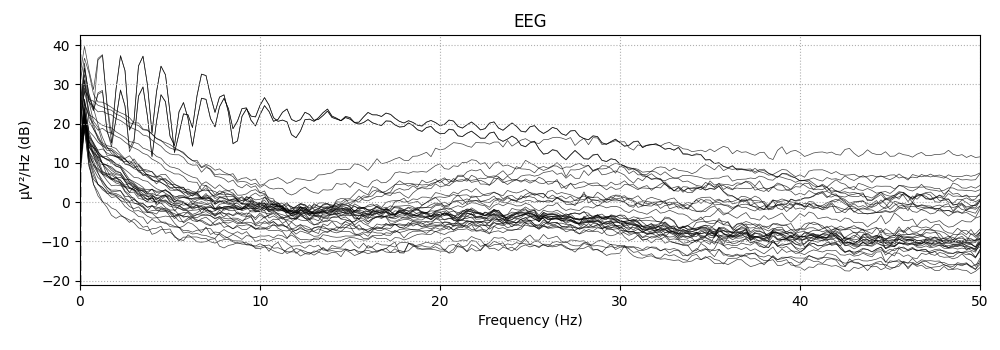

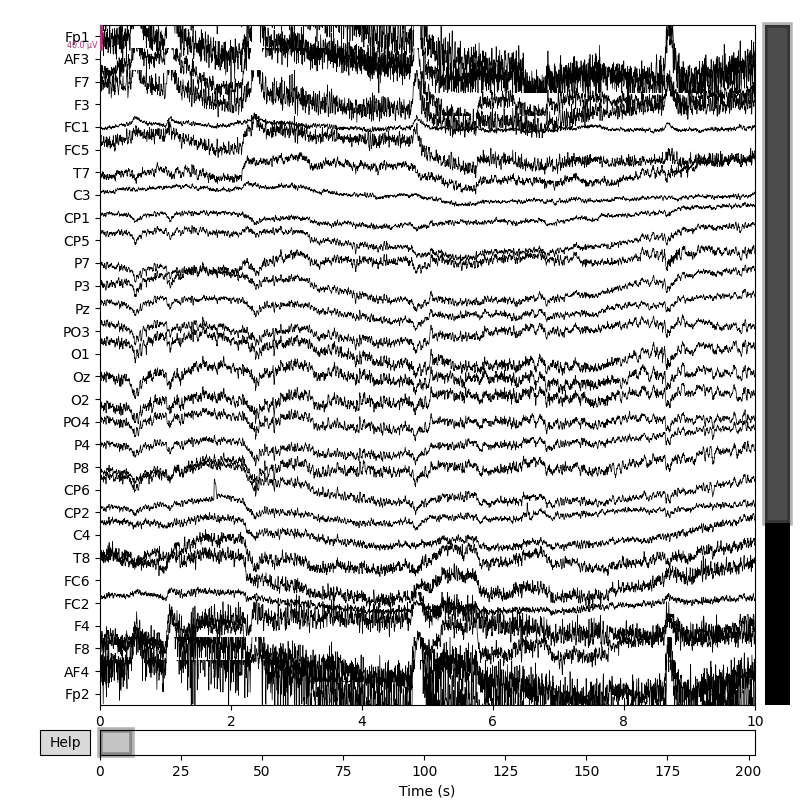

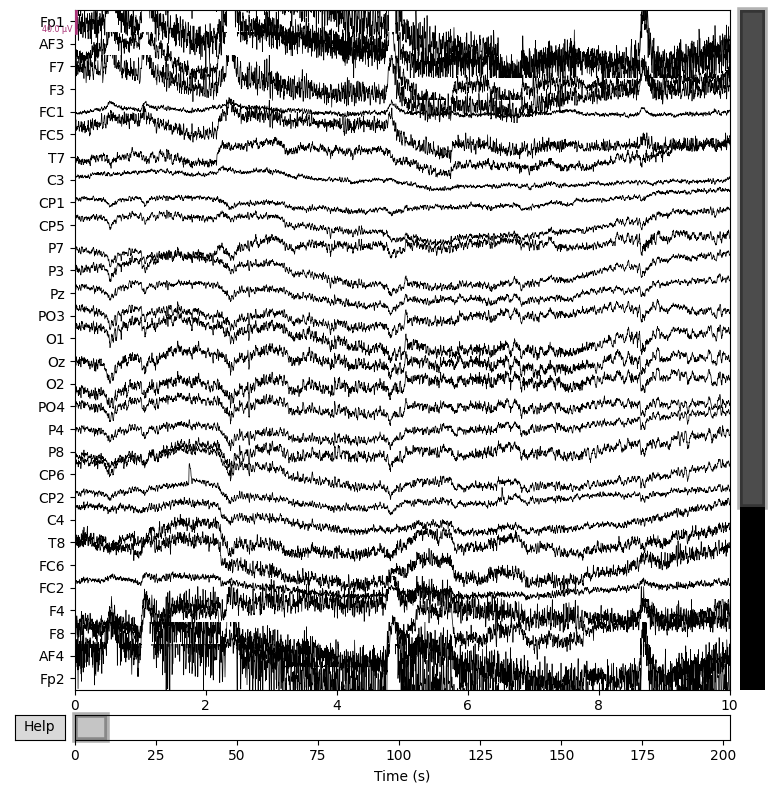

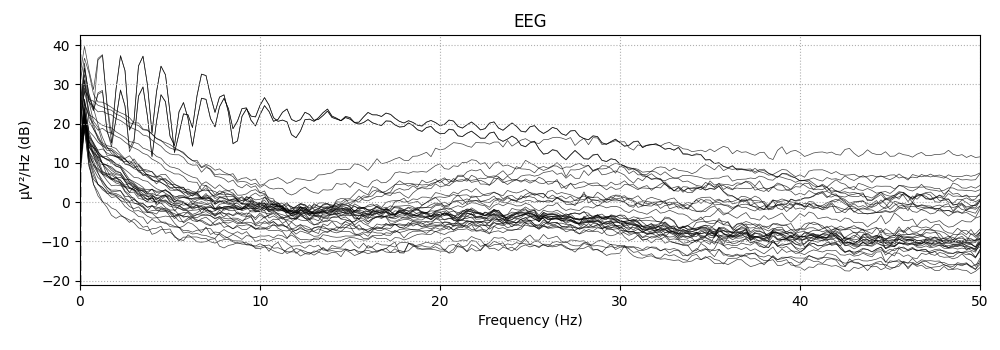

In [17]:
# 可以进一步进行数据分析和可视化
# 例如，绘制第一个通道的EEG数据
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.plot(duration=10, n_channels=30)

In [14]:
info = raw.info

In [16]:
print(info.keys())

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])


In [25]:
import os
# 定义文件夹路径
folder_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset'
# 获取文件夹中的所有文件名
file_names = os.listdir(folder_path)
bdf_hc_files = []

In [26]:
# 定义文件夹路径
folder_path = '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset'

# 获取文件夹中所有子文件夹的列表
sub_folders = os.listdir(folder_path)
# 遍历每个子文件夹
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(folder_path, sub_folder, 'ses-hc', 'eeg')#bdf文件的字文件夹路径
    # 判断路径是否存在
    if os.path.exists(sub_folder_path):
        file_names = os.listdir(sub_folder_path)
        for file in file_names:
            if file.lower().endswith('bdf'):
                bdf_file_path = os.path.join(sub_folder_path, file)#bdf文件的完整路径
                bdf_hc_files.append(bdf_file_path)

In [27]:
bdf_hc_files

['/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc4/ses-hc/eeg/sub-hc4_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc2/ses-hc/eeg/sub-hc2_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc25/ses-hc/eeg/sub-hc25_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc24/ses-hc/eeg/sub-hc24_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc30/ses-hc/eeg/sub-hc30_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc31/ses-hc/eeg/sub-hc31_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc7/ses-hc/eeg/sub-hc7_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc1/ses-hc/eeg/sub-hc1_ses-hc_task-rest_eeg.bdf',
 '/Users/mac/Desktop/Seizure_detection/SanDiego_dataset/sub-hc8/ses-hc/eeg/sub-hc8_ses-hc_task-rest_eeg.bdf',
 '

In [17]:
file_names

['sub-hc32_ses-hc_task-rest_channels.tsv',
 'sub-hc32_ses-hc_task-rest_events.tsv',
 'sub-hc32_ses-hc_task-rest_eeg.bdf',
 'sub-hc32_ses-hc_task-rest_eeg.json']

In [12]:


# 遍历每个子文件夹
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(folder_path, sub_folder, 'ses-hc', 'eeg')#bdf文件的字文件夹路径
    file_names = os.listdir(sub_folder_path)
    for file in file_names:
        if file.lower().endwith('.bdf'):
            bdf_file_path = os.path.join(sub_folder_path, file)#bdf文件的完整路径
            bdf_files.append(bdf_file_path)
    

AttributeError: 'str' object has no attribute 'endwith'

In [13]:
file_names

['sub-hc4_ses-hc_task-rest_eeg.json',
 'sub-hc4_ses-hc_task-rest_events.tsv',
 'sub-hc4_ses-hc_task-rest_eeg.bdf',
 'sub-hc4_ses-hc_task-rest_channels.tsv']

In [ ]:
for file in file_names:
    file_path = os.path.join(folder_path, file)

In [ ]:
for root, dirs, file in os.walk('/Users/mac/Desktop/Seizure_detection/SanDiego_dataset'): #遍历文件夹
    for file in files:
        print(file)

In [ ]:
for root, dirs, files in os.walk('/Users/mac/Desktop/Seizure_detection/SanDiego_dataset'):
    for file in files:
        print(os.path.join(root, file))

# 仅选择以 ".bdf" 结尾的文件
bdf_files = [file for file in file_names if file.lower().endswith('.bdf')]

# 使用MNE库读取每个BDF文件
for bdf_file in bdf_files:
    bdf_file_path = os.path.join(folder_path, bdf_file)
    raw = mne.io.read_raw_bdf(bdf_file_path, preload=True)
    # 进行数据处理和分析，或者其他操作
    # 例如：raw.plot()

    # 打印一些信息
    print(f"Processed {bdf_file}")

print("All BDF files processed.")
